In [1]:
import os

def get_paths_from_dir(dir_path):
    return [dir_path + d for d in next(os.walk(dir_path))[2] if d != ".DS_Store"]


In [2]:
train_paths = get_paths_from_dir("ISBI/train/")
mask_paths = get_paths_from_dir("ISBI/label/")

In [3]:
from image_flow import SegDataGenerator

/Users/dexterfichuk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Some usage of OG https://github.com/aurora95/Keras-FCN/blob/master/train.py
target_size = (150, 150)
datagen = SegDataGenerator(zoom_range=[0.5, 2.0],
                                     zoom_maintain_shape=True,
                                     crop_mode='random',
                                     crop_size=target_size,
                                     rotation_range=0.,
                                     shear_range=0,
                                     horizontal_flip=True,
                                     channel_shift_range=20.,
                                     fill_mode='constant')


In [35]:
gen = datagen.flow_from_directory(data_paths = train_paths, 
                            label_paths = mask_paths, label_suffix = "tif", classes = 2,
                            target_size=target_size, color_mode='rgb',
                            class_mode='sparse', batch_size=32, shuffle=True, seed=42)
X,y = gen.next()


In [36]:
import numpy as np

np.where(y[0] != 0, 1, 0).shape

(150, 150, 1)

In [49]:
import matplotlib.pylab as plt
%matplotlib inline

j = 5

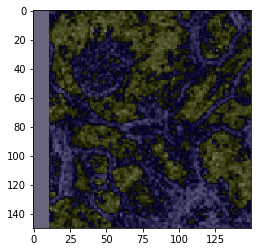

In [50]:
plt.imshow((abs(X[j])/255.))

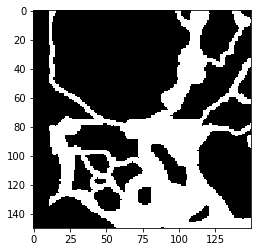

In [51]:
plt.imshow(y[j].reshape(150,150), cmap='Greys',  interpolation='nearest')
